In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('/kaggle/input/bitcoin-price-and-fear-greed-index-20182024/bitcoin_fear_greed_2018_2024.csv')

In [82]:
df = df.convert_dtypes()
df['Date'] = pd.to_datetime(df['Date'])

In [83]:
df.head()

,Date,Open,High,Low,Close,Volume,Fear_Greed_Index,Sentiment
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,30,Fear
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.75,12726899712,15,Extreme Fear
2,2018-02-03,8852.120117,9430.75,8251.629883,9174.910156,7263790080,40,Fear
3,2018-02-04,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,24,Extreme Fear
4,2018-02-05,8270.540039,8364.839844,6756.680176,6955.27002,9285289984,11,Extreme Fear


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2224 non-null   datetime64[ns]
 1   Open              2224 non-null   Float64       
 2   High              2224 non-null   Float64       
 3   Low               2224 non-null   Float64       
 4   Close             2224 non-null   Float64       
 5   Volume            2224 non-null   Int64         
 6   Fear_Greed_Index  2224 non-null   Int64         
 7   Sentiment         2224 non-null   string        
dtypes: Float64(4), Int64(2), datetime64[ns](1), string(1)
memory usage: 152.2 KB


In [85]:
df.describe()

,Date,Open,High,Low,Close,Volume,Fear_Greed_Index
count,2224,2224.0,2224.0,2224.0,2224.0,2224.0,2224.0
mean,2021-02-19 09:40:08.633093632,22670.546387,23186.574184,22124.959319,22694.141595,25556874347.390736,44.877248
min,2018-02-01 00:00:00,3236.274658,3275.37793,3191.303467,3236.761719,2923670016.0,5.0
25%,2019-08-13 18:00:00,8416.294434,8627.179688,8202.243164,8422.949707,12912841450.5,26.0
50%,2021-02-19 12:00:00,19061.058594,19359.362305,18603.873047,19087.549805,22793063823.5,42.0
75%,2022-08-29 06:00:00,35425.001953,36408.829102,34072.817383,35458.160156,34152641743.0,61.0
max,2024-03-07 00:00:00,68341.054688,69170.625,66382.0625,68330.414062,350967941479.0,95.0
std,NaN,16502.62203,16919.248987,16052.428963,16523.801624,18736500834.60651,21.590778


# Time Series Analysis

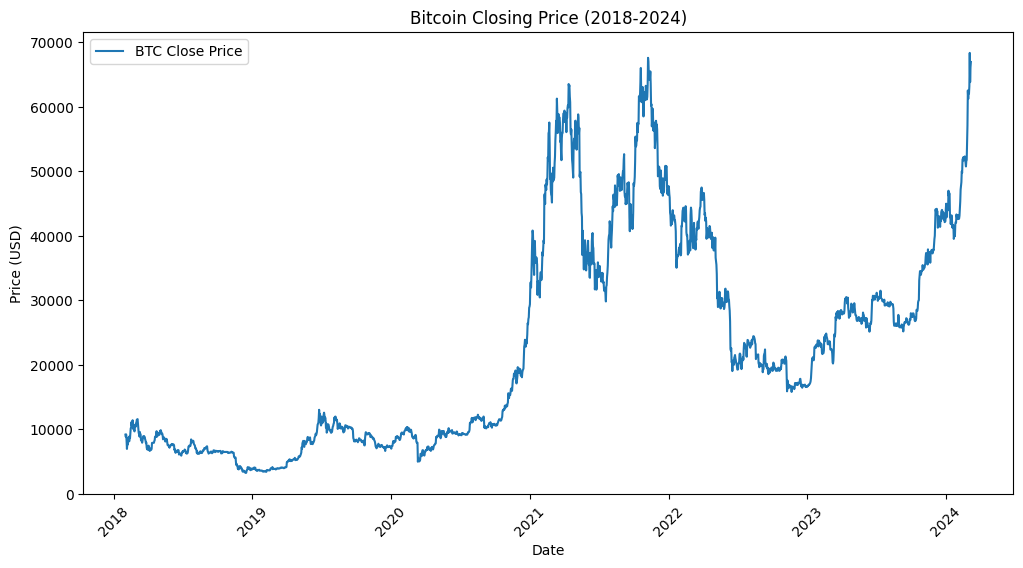

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='BTC Close Price')
plt.title('Bitcoin Closing Price (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

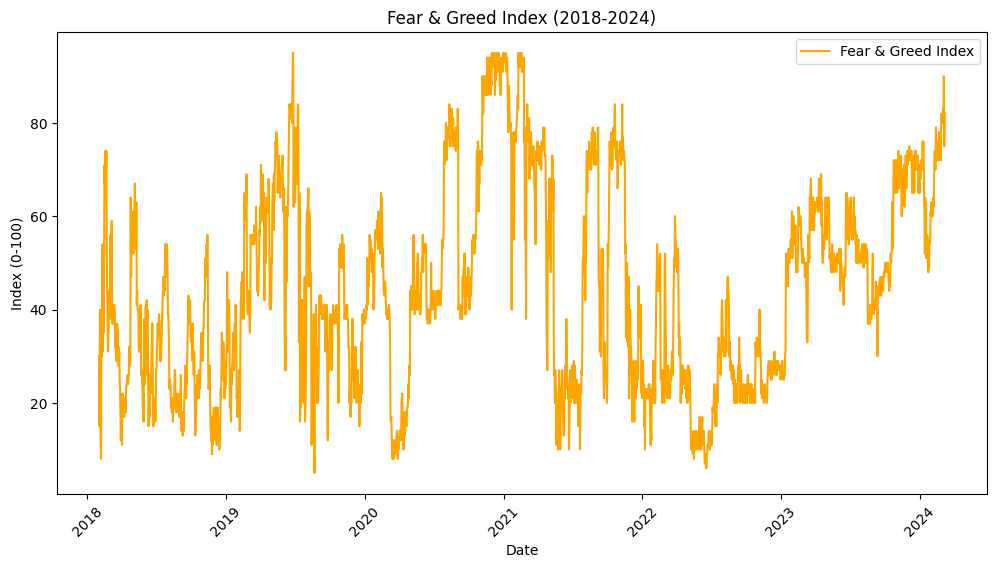

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Fear_Greed_Index'], label='Fear & Greed Index', color='orange')
plt.title('Fear & Greed Index (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Index (0-100)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

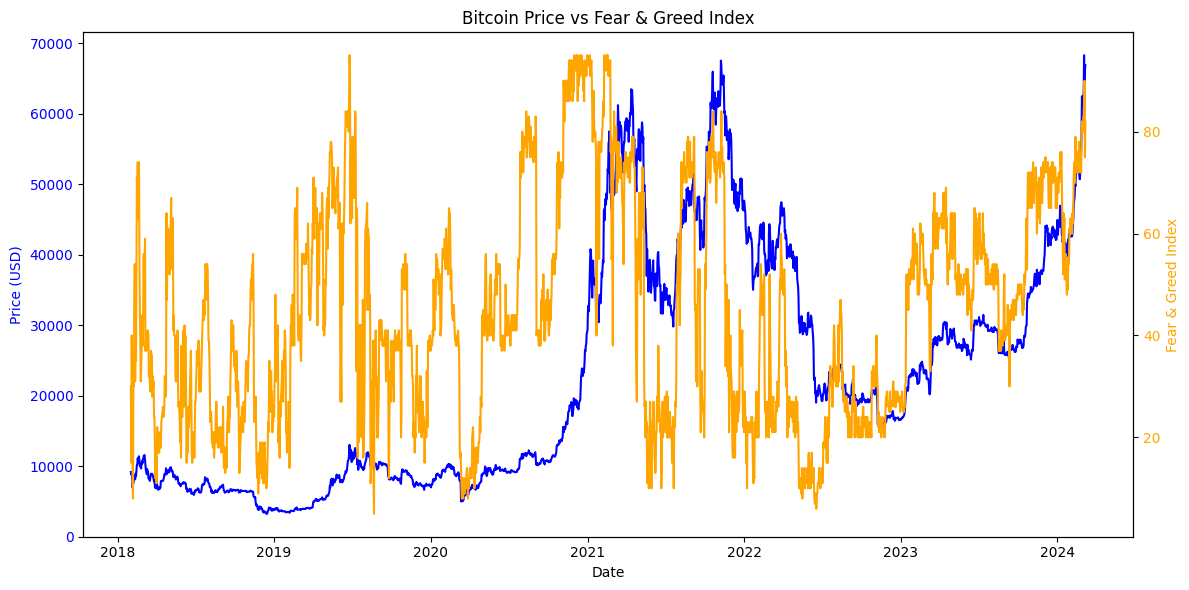

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df['Date'], df['Close'], color='blue', label='BTC Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Fear_Greed_Index'], color='orange', label='Fear & Greed Index')
ax2.set_ylabel('Fear & Greed Index', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Bitcoin Price vs Fear & Greed Index')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

# Distribution Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


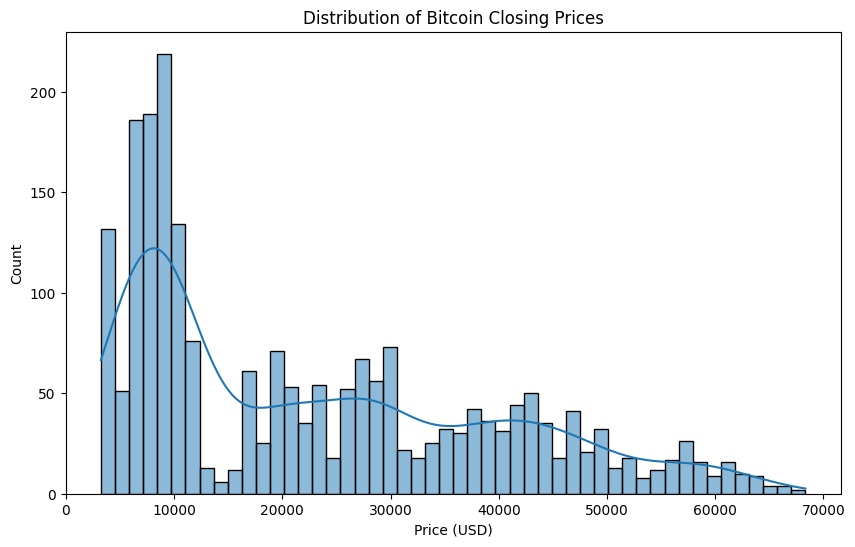

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Price (USD)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


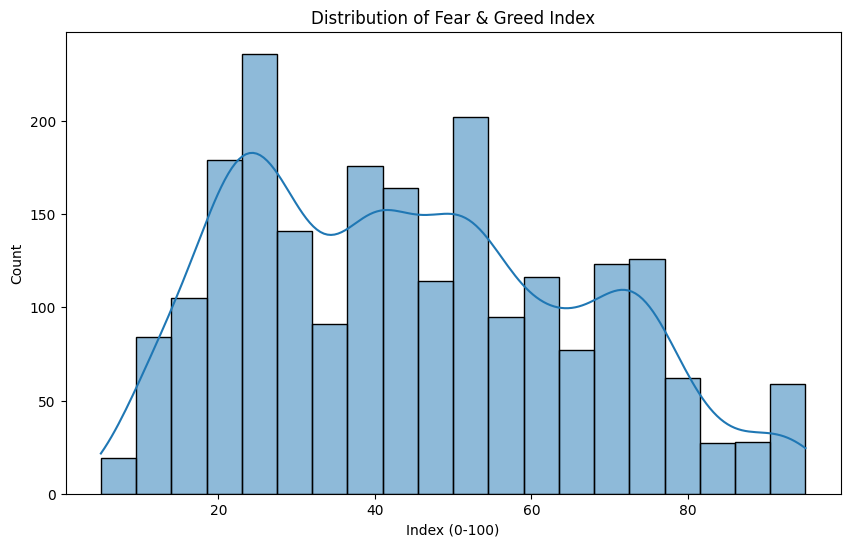

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fear_Greed_Index'], bins=20, kde=True)
plt.title('Distribution of Fear & Greed Index')
plt.xlabel('Index (0-100)')
plt.show()

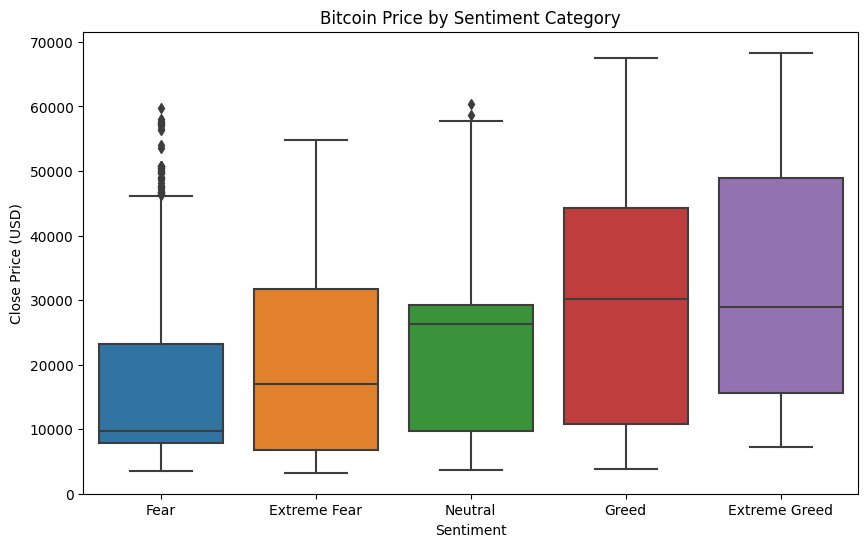

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Close', data=df)
plt.title('Bitcoin Price by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Close Price (USD)')
plt.show()

# Correlation Analysis

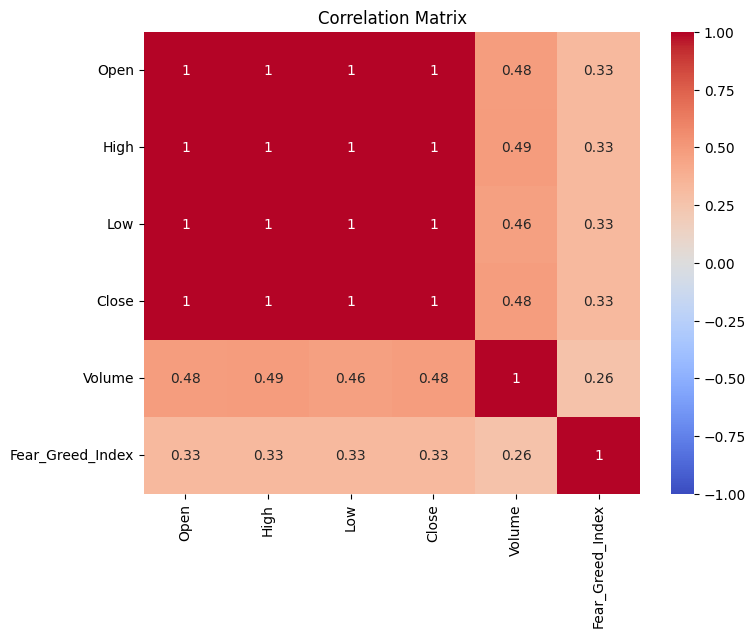

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Fear_Greed_Index']].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

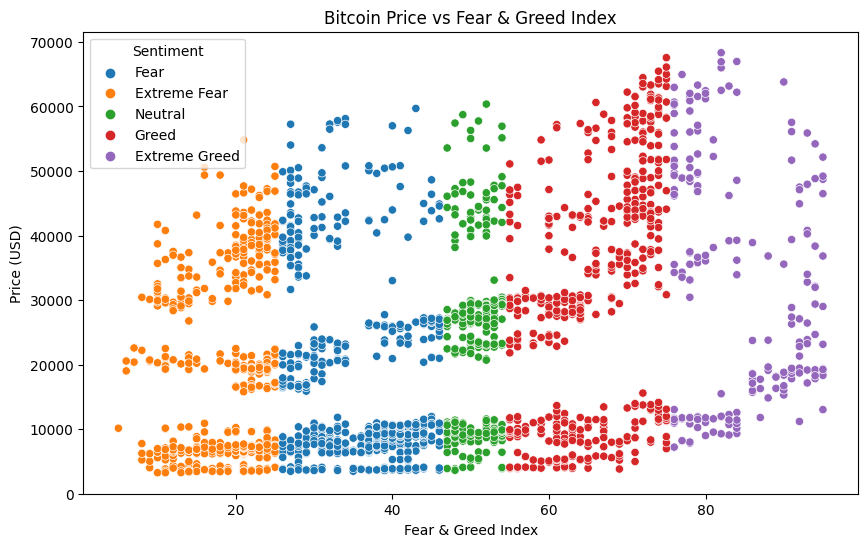

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fear_Greed_Index', y='Close', hue='Sentiment', data=df)
plt.title('Bitcoin Price vs Fear & Greed Index')
plt.xlabel('Fear & Greed Index')
plt.ylabel('Price (USD)')
plt.show()

# Volume Analysis

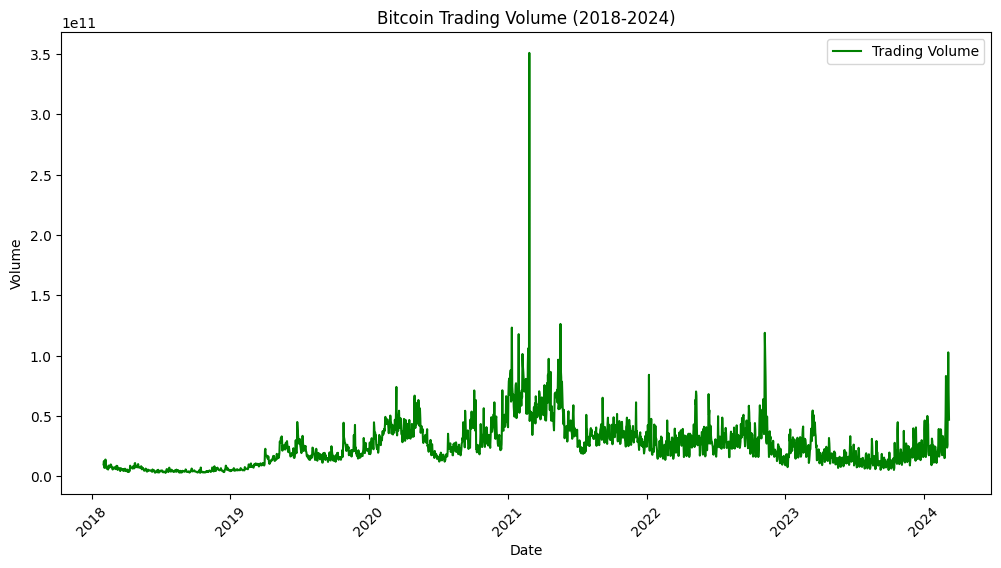

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Trading Volume', color='green')
plt.title('Bitcoin Trading Volume (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

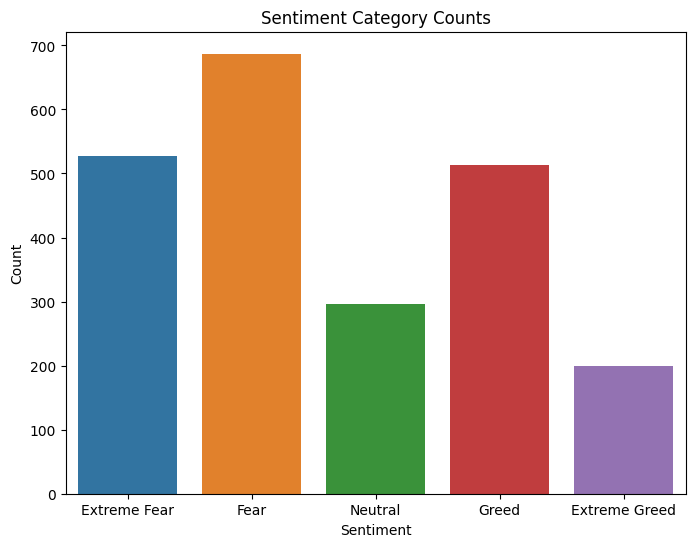

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Sentiment Category Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Year', ylabel='Close'>

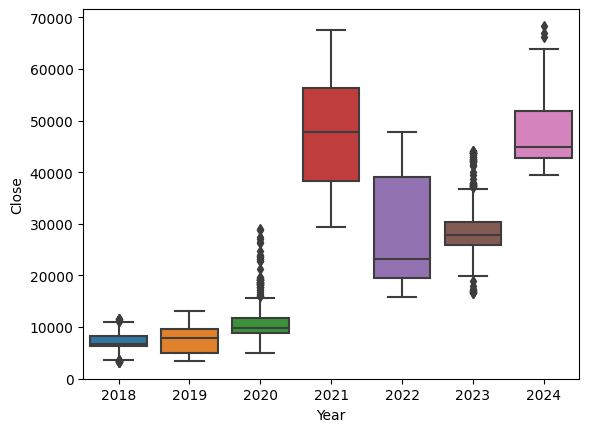

In [96]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
sns.boxplot(x='Year', y='Close', data=df)

# Key Questions to Answer
1. Price Trends: When were the major peaks and troughs in Bitcoin price?
2. Sentiment Influence: Does "Extreme Fear" typically precede price recoveries? Does "Extreme Greed" signal tops?
3. Correlation: Is there a clear relationship between Fear_Greed_Index and Close price?
4. Volatility: Are periods of high volume linked to sentiment extremes?

**Price Trends: When were the major peaks and troughs in Bitcoin price?**

In [97]:
# Date of the maximum closing price
max_close_date = df.loc[df['Close'] == df['Close'].max(), 'Date'].values[0]
print("Date of maximum closing price:", max_close_date)

# Date of the minimum closing price
min_close_date = df.loc[df['Close'] == df['Close'].min(), 'Date'].values[0]
print("Date of minimum closing price:", min_close_date)

Date of maximum closing price: 2024-03-04T00:00:00.000000000
Date of minimum closing price: 2018-12-15T00:00:00.000000000


In [98]:
# Add a 'Year' column to the dataframe
df['Year'] = df['Date'].dt.year

# Group by year and find maximum and minimum closing prices
yearly_max = df.groupby('Year')['Close'].max()
yearly_min = df.groupby('Year')['Close'].min()
print("Yearly maximum closing prices:\n", yearly_max)
print("Yearly minimum closing prices:\n", yearly_min)

Yearly maximum closing prices:
 Year
2018    11573.299805
2019    13016.231445
2020    29001.720703
2021    67566.828125
2022      47686.8125
2023    44166.601562
2024    68330.414062
Name: Close, dtype: Float64
Yearly minimum closing prices:
 Year
2018     3236.761719
2019      3399.47168
2020     4970.788086
2021    29374.152344
2022     15787.28418
2023    16625.080078
2024    39507.367188
Name: Close, dtype: Float64


**Sentiment Influence: Does "Extreme Fear" typically precede price recoveries? Does "Extreme Greed" signal tops?**

In [99]:
# Create a column for the 30-day future price change (percentage)
df['Price_Change_30d'] = (df['Close'].shift(-30) - df['Close']) / df['Close'] * 100

# Calculate the average 30-day price change for each sentiment category
avg_change_by_sentiment = df.groupby('Sentiment')['Price_Change_30d'].mean()
print("Average 30-day price change by sentiment:\n", avg_change_by_sentiment)

Average 30-day price change by sentiment:
 Sentiment
Extreme Fear      3.648567
Extreme Greed    19.082552
Fear              0.886569
Greed             5.595157
Neutral            4.36848
Name: Price_Change_30d, dtype: Float64


**Correlation: Is there a clear relationship between Fear_Greed_Index and Close price?**

In [100]:
# Correlation between Fear_Greed_Index and Close (contemporaneous)
corr_index_close = df['Fear_Greed_Index'].corr(df['Close'])
print("Correlation between Fear_Greed_Index and Close:", corr_index_close)

# Correlation between Fear_Greed_Index and 30-day future price change (predictive)
corr_index_change = df['Fear_Greed_Index'].corr(df['Price_Change_30d'])
print("Correlation between Fear_Greed_Index and Price_Change_30d:", corr_index_change)

Correlation between Fear_Greed_Index and Close: 0.3279688138458712
Correlation between Fear_Greed_Index and Price_Change_30d: 0.16125550864528365


**Volatility: Are periods of high volume linked to sentiment extremes?**

Average volume by sentiment:
 Sentiment
Extreme Fear     24268298482.304924
Extreme Greed    45569956928.074997
Fear             20668922486.106258
Greed            27942600569.093567
Neutral          21543012582.516891
Name: Volume, dtype: Float64


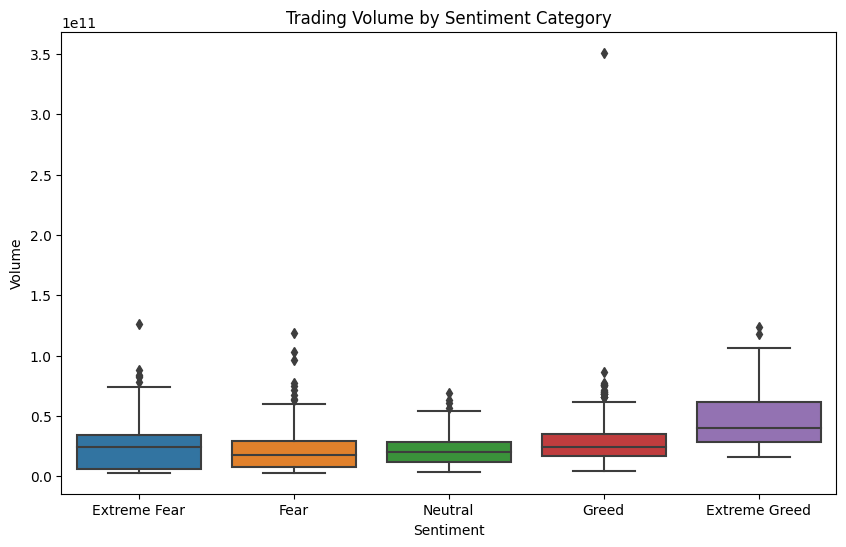

In [101]:
# Calculate average volume for each sentiment category
avg_volume_by_sentiment = df.groupby('Sentiment')['Volume'].mean()
print("Average volume by sentiment:\n", avg_volume_by_sentiment)

# Optional: Visualize volume distribution by sentiment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Volume', data=df, order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Trading Volume by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Volume')
plt.show()

# Time series forecasting

In [123]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Data Preparation
# Load your data (replace with your actual path)
df = pd.read_csv('/kaggle/input/bitcoin-price-and-fear-greed-index-20182024/bitcoin_fear_greed_2018_2024.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Select numerical columns
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Fear_Greed_Index']
features = df[numerical_columns]

# Train-Validation-Test Split (chronological)
total_len = len(df)
train_size = int(0.7 * total_len)  # 70% train
val_size = int(0.15 * total_len)   # 15% validation
test_size = total_len - train_size - val_size  # 15% test

train_data = features.iloc[:train_size]
val_data = features.iloc[train_size:train_size + val_size]
test_data = features.iloc[train_size + val_size:]

# Normalize using training set statistics
train_mean = train_data.mean()
train_std = train_data.std()

train_normalized = (train_data - train_mean) / train_std
val_normalized = (val_data - train_mean) / train_std
test_normalized = (test_data - train_mean) / train_std

# Convert to numpy arrays with float32 type
train_data_np = train_normalized.to_numpy(dtype=np.float32)
val_data_np = val_normalized.to_numpy(dtype=np.float32)
test_data_np = test_normalized.to_numpy(dtype=np.float32)

# Custom Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, seq_len):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.seq_len = seq_len

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_len]  # Shape: (seq_len, 6)
        y = self.data[idx + 1:idx + self.seq_len + 1, 4]  # Volume column (index 4)
        return x, y

# Set sequence length and create datasets
seq_len = 30
train_dataset = TimeSeriesDataset(train_data_np, seq_len)
val_dataset = TimeSeriesDataset(val_data_np, seq_len)
test_dataset = TimeSeriesDataset(test_data_np, seq_len)

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [124]:
# 2. Model Definition
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0)]
        return x

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim=6, d_model=64, nhead=4, num_layers=2, seq_len=30):
        super().__init__()
        self.d_model = d_model  # Define d_model as an instance variable
        self.seq_len = seq_len
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=4*d_model,
            dropout=0.1,
            batch_first=True  # Set batch_first=True to avoid warning
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(d_model, 1)

    def forward(self, src):
        # src: (batch, seq_len, input_dim)
        src = self.embedding(src) * math.sqrt(self.d_model)  # (batch, seq_len, d_model)
        src = self.pos_encoder(src.transpose(0, 1)).transpose(0, 1)  # Adjust for batch_first=True
        mask = torch.triu(torch.ones(self.seq_len, self.seq_len), diagonal=1).bool().to(src.device)
        output = self.transformer_encoder(src, mask=mask)  # (batch, seq_len, d_model)
        output = self.decoder(output)  # (batch, seq_len, 1)
        return output.squeeze(-1)  # (batch, seq_len)

In [134]:
# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TimeSeriesTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Early Stopping Parameters
num_epochs = 100
patience = 10
best_val_loss = float('inf')
patience_counter = 0

# Training Loop
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for x, y in train_loader:
        x = x.to(device)  # (batch, seq_len, input_dim)
        y = y.to(device)  # (batch, seq_len)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to(device)
            y = y.to(device)
            output = model(x)
            val_loss += criterion(output, y).item()
    val_loss /= len(val_loader)
    if ((epoch % 10) == 0):
        print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

Epoch 1, Train Loss: 0.3603, Val Loss: 0.3443
Epoch 11, Train Loss: 0.1976, Val Loss: 0.2438
Epoch 21, Train Loss: 0.1749, Val Loss: 0.2719
Early stopping triggered


<ipython-input-137-5e7a13520877>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth', map_location=device))


Test MAE: 7370747904.00
Test RMSE: 8621203456.00


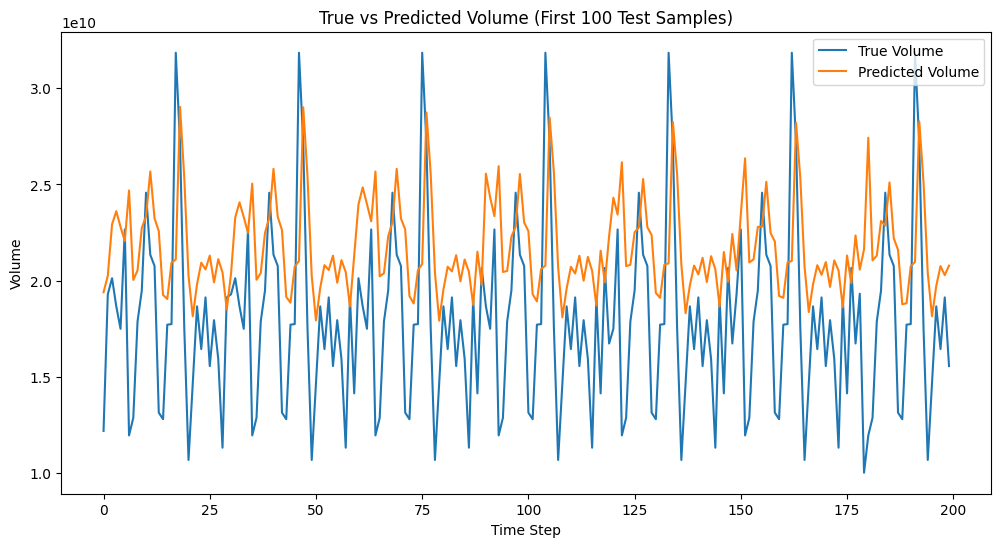

In [137]:

# 4. Evaluation
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval()
predictions = []
true_values = []

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        y = y.to(device)
        output = model(x)
        predictions.append(output.cpu().numpy())
        true_values.append(y.cpu().numpy())

# Flatten predictions and true values
predictions = np.concatenate(predictions, axis=0).flatten()
true_values = np.concatenate(true_values, axis=0).flatten()

# Inverse transform to original scale
volume_mean = train_mean['Volume']
volume_std = train_std['Volume']
pred_original = predictions * volume_std + volume_mean
true_original = true_values * volume_std + volume_mean

# Compute metrics
mae = mean_absolute_error(true_original, pred_original)
rmse = np.sqrt(mean_squared_error(true_original, pred_original))
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

# Plot predictions vs true values
plt.figure(figsize=(12, 6))
plt.plot(true_original[:200], label='True Volume')
plt.plot(pred_original[:200], label='Predicted Volume')
plt.title('True vs Predicted Volume (First 100 Test Samples)')
plt.xlabel('Time Step')
plt.ylabel('Volume')
plt.legend()
plt.show()